#### Cell 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


#### Cell 2: Load CSV Dataset



In [2]:
import pandas as pd

# Load full 366-day dataset
df = pd.read_csv("booking_data.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Display dataset in 15-day chunks
chunk_size = 15
for start in range(0, len(df), chunk_size):
    end = start + chunk_size
    print(df[['date', 'bookings', 'occupancy', 'guests']].iloc[start:end])
    print("\n" + "-"*50 + "\n")


         date  bookings  occupancy  guests
0  2024-01-01       128         60      58
1  2024-01-02       158         78      64
2  2024-01-03       135         58      57
3  2024-01-04       121         52      47
4  2024-01-05       115         68      40
5  2024-01-06       150         79      73
6  2024-01-07       129         59      58
7  2024-01-08       132         53      63
8  2024-01-09       142         70      58
9  2024-01-10       150         68      54
10 2024-01-11       135         59      65
11 2024-01-12       177         75      81
12 2024-01-13       154         81      59
13 2024-01-14       151         70      60
14 2024-01-15       141         84      60

--------------------------------------------------

         date  bookings  occupancy  guests
15 2024-01-16       178         79      85
16 2024-01-17       141         66      57
17 2024-01-18       178        106      68
18 2024-01-19       167         79      67
19 2024-01-20       174        101      80
2

#### Cell 3: Convert Date and Extract Features

In [4]:
import pandas as pd

# 1. Load your data
df = pd.read_csv("booking_data.csv")

# 2. Define Features (X) and Target (y)
X = df[['occupancy', 'guests']]   # example features
y = df['bookings']                # target column

# 3. Display first few rows
print("Feature Columns (X):")
display(X.head(10))

print("\nTarget Column (y - bookings):")
display(y.head(10))

# 4. Optional: Combined table
df_combined = X.copy()
df_combined['bookings'] = y
print("\nCombined Features and Target:")
display(df_combined.head(10))


Feature Columns (X):


,occupancy,guests
0,60,58
1,78,64
2,58,57
3,52,47
4,68,40
5,79,73
6,59,58
7,53,63
8,70,58
9,68,54



Target Column (y - bookings):


0    128
1    158
2    135
3    121
4    115
5    150
6    129
7    132
8    142
9    150
Name: bookings, dtype: int64


Combined Features and Target:


,occupancy,guests,bookings
0,60,58,128
1,78,64,158
2,58,57,135
3,52,47,121
4,68,40,115
5,79,73,150
6,59,58,129
7,53,63,132
8,70,58,142
9,68,54,150


#### Cell 4: Display First Month


In [5]:
import pandas as pd

# Load full 366-day dataset
df = pd.read_csv("booking_data.csv")

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek

# Display dataset in 15-day chunks with new features
chunk_size = 15
for start in range(0, len(df), chunk_size):
    end = start + chunk_size
    print(df[['date', 'bookings', 'occupancy', 'guests', 'day', 'month', 'year', 'day_of_week']].iloc[start:end])
    print("\n" + "-"*80 + "\n")


         date  bookings  occupancy  guests  day  month  year  day_of_week
0  2024-01-01       128         60      58    1      1  2024            0
1  2024-01-02       158         78      64    2      1  2024            1
2  2024-01-03       135         58      57    3      1  2024            2
3  2024-01-04       121         52      47    4      1  2024            3
4  2024-01-05       115         68      40    5      1  2024            4
5  2024-01-06       150         79      73    6      1  2024            5
6  2024-01-07       129         59      58    7      1  2024            6
7  2024-01-08       132         53      63    8      1  2024            0
8  2024-01-09       142         70      58    9      1  2024            1
9  2024-01-10       150         68      54   10      1  2024            2
10 2024-01-11       135         59      65   11      1  2024            3
11 2024-01-12       177         75      81   12      1  2024            4
12 2024-01-13       154         81    

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load dataset
df = pd.read_csv("booking_data.csv")

# 2. Define Features (X) and Target (y)
X = df[['occupancy', 'guests']]   # change if you have more features
y = df['bookings']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### Cell 5: Prepare Features and Target

In [12]:
from IPython.display import display, HTML

# ---------- HEADER ----------
print("===== 📊 DATASET TRAIN/TEST INFORMATION =====\n")

# ---------- SHAPES ----------
print("🔹 Training Features (X_train) shape:", X_train.shape)
print("🔹 Test Features (X_test) shape:", X_test.shape)
print("🔹 Training Target (y_train) shape:", y_train.shape)
print("🔹 Test Target (y_test) shape:", y_test.shape)


# ---------- PREVIEW: X_train ----------
print("\n===== 🧩 X_train Sample (First 10 Rows) =====")
display(X_train.head(10))


# ---------- PREVIEW: X_test ----------
print("\n===== 🔍 X_test Sample (First 10 Rows) =====")
display(X_test.head(10))


# ---------- PREVIEW: y_train ----------
print("\n===== 🎯 y_train Sample (First 10) =====")
display(y_train.head(10))


# ---------- PREVIEW: y_test ----------
print("\n===== 🎯 y_test Sample (First 10) =====")
display(y_test.head(10))


# ---------- COMBINED TRAIN ----------
df_train = X_train.copy()
df_train['bookings'] = y_train

print("\n===== 📘 Combined Training Data (Features + Target) =====")
display(df_train.head(10))


# ---------- COMBINED TEST ----------
df_test = X_test.copy()
df_test['bookings'] = y_test

print("\n===== 📙 Combined Test Data (Features + Target) =====")
display(df_test.head(10))



===== 📊 DATASET TRAIN/TEST INFORMATION =====

🔹 Training Features (X_train) shape: (292, 2)
🔹 Test Features (X_test) shape: (74, 2)
🔹 Training Target (y_train) shape: (292,)
🔹 Test Target (y_test) shape: (74,)

===== 🧩 X_train Sample (First 10 Rows) =====


,occupancy,guests
341,121,92
202,112,90
75,130,122
84,99,74
354,113,89
16,66,57
66,101,80
271,46,50
7,53,63
113,110,82



===== 🔍 X_test Sample (First 10 Rows) =====


,occupancy,guests
193,85,84
33,63,68
15,79,85
310,38,34
57,56,46
183,60,60
76,148,115
119,103,84
152,112,93
126,117,94



===== 🎯 y_train Sample (First 10) =====


341    220
202    198
75     253
84     206
354    209
16     141
66     223
271    104
7      132
113    227
Name: bookings, dtype: int64


===== 🎯 y_test Sample (First 10) =====


193    172
33     146
15     178
310     79
57     117
183    127
76     249
119    216
152    192
126    206
Name: bookings, dtype: int64


===== 📘 Combined Training Data (Features + Target) =====


,occupancy,guests,bookings
341,121,92,220
202,112,90,198
75,130,122,253
84,99,74,206
354,113,89,209
16,66,57,141
66,101,80,223
271,46,50,104
7,53,63,132
113,110,82,227



===== 📙 Combined Test Data (Features + Target) =====


,occupancy,guests,bookings
193,85,84,172
33,63,68,146
15,79,85,178
310,38,34,79
57,56,46,117
183,60,60,127
76,148,115,249
119,103,84,216
152,112,93,192
126,117,94,206


#### Cell 6: Split Data into Training and Test Sets

In [13]:
# Initialize model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train model
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "rf_booking_model.pkl")


['rf_booking_model.pkl']

#### Cell-7 Model Evaluation: Predictions & Performance Metrics

In [14]:
# Predict on test set
predictions = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE: 11.73
RMSE: 14.45
R2 Score: 0.94


#### Cell 8 — Predict and evaluate

C:\Users\ACER\AppData\Local\Temp\ipykernel_15256\3012026801.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\xampp\htdocs\ai\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


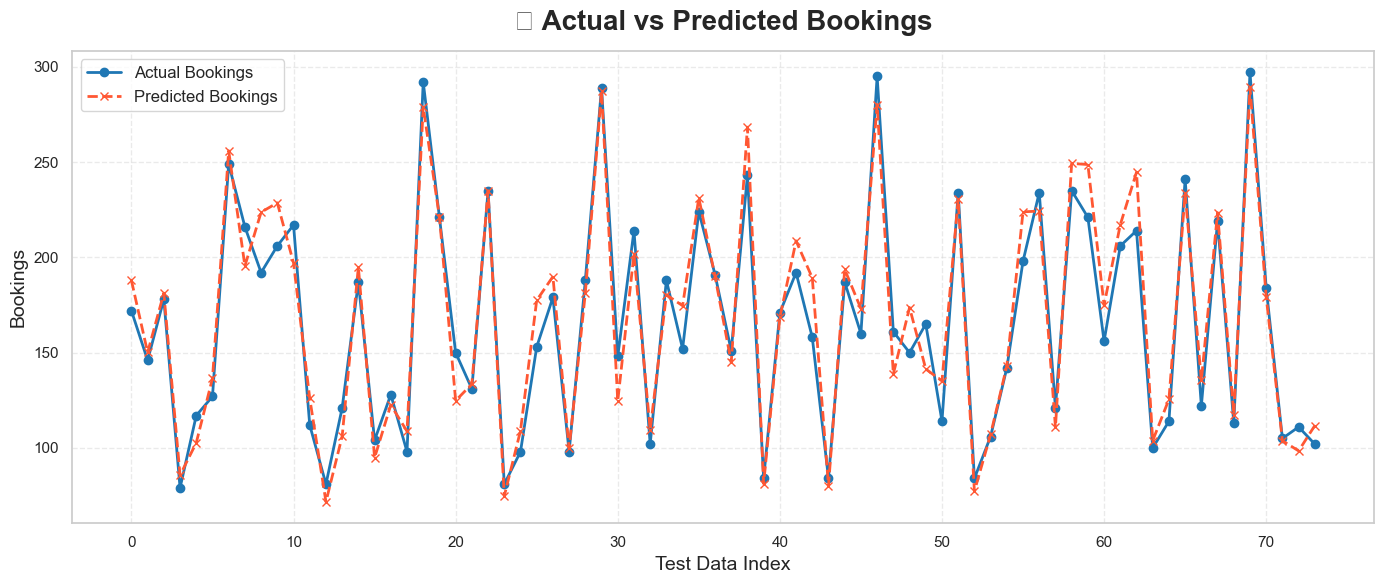

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Modern clean style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14,6))

# Plot actual
plt.plot(
    y_test.values,
    label="Actual Bookings",
    marker='o',
    markersize=6,
    linewidth=2,
    color="#1F77B4"     # clean blue
)

# Plot predicted
plt.plot(
    predictions,
    label="Predicted Bookings",
    marker='x',
    markersize=6,
    linewidth=2,
    linestyle="--",
    color="#FF5733"     # modern orange-red
)

# Labels & title
plt.title("📊 Actual vs Predicted Bookings", fontsize=20, fontweight="bold", pad=15)
plt.xlabel("Test Data Index", fontsize=14)
plt.ylabel("Bookings", fontsize=14)

# Grid & legend
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


#### Cell 9 — Monthly Average Bar Chart

C:\Users\ACER\AppData\Local\Temp\ipykernel_15256\1096631207.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\xampp\htdocs\ai\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


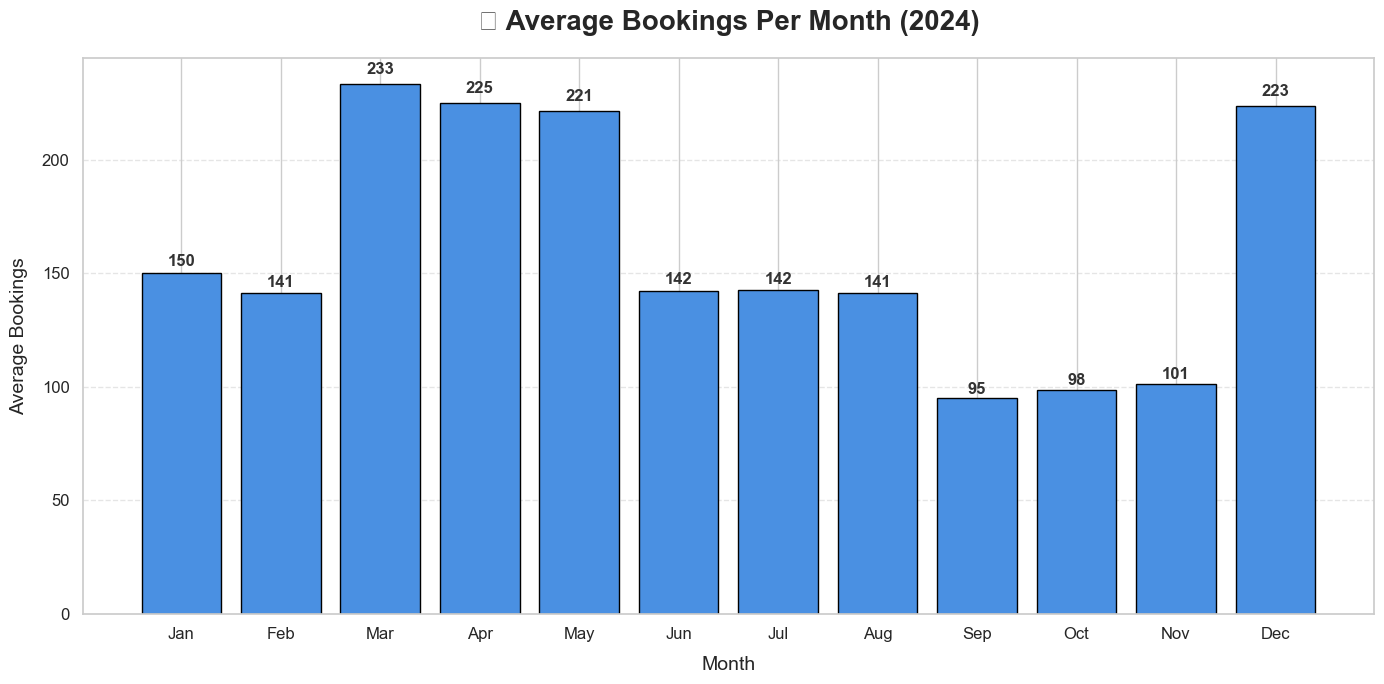

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("booking_data.csv")
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Group by month
monthly_avg = df.groupby('month')['bookings'].mean()

# --- Clean Professional Styling ---
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14,7))

# Solid professional color
bar_color = "#4A90E2"  # clean bright blue

# Create bars
bars = plt.bar(
    monthly_avg.index,
    monthly_avg.values,
    color=bar_color,
    edgecolor='black',
    linewidth=1
)

# Add value labels above bars
for bar in bars:
    y = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        y + (y * 0.02),
        f"{int(y)}",
        ha="center",
        fontsize=12,
        fontweight="bold",
        color="#333"
    )

# Title & labels
plt.title("📊 Average Bookings Per Month (2024)", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Month", fontsize=14, labelpad=10)
plt.ylabel("Average Bookings", fontsize=14, labelpad=10)

# Month names
plt.xticks(
    monthly_avg.index,
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    fontsize=12
)

plt.yticks(fontsize=12)

# Clean grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
